# Cats and Dogs Tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

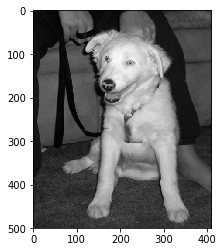

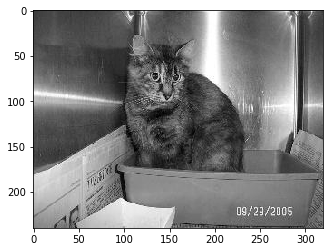

In [7]:

DATADIR = 'PetImages/'
CATEGORIES = ['Dog','Cat']

for categories in CATEGORIES:
    path = os.path.join(DATADIR, categories) # path to dogs or cats directories
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break

In [8]:
# size of the cat
print(img_array.shape)

(240, 320)


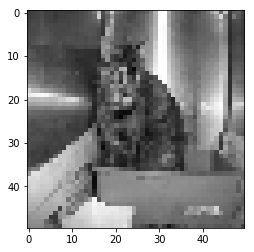

In [20]:
# lets make everything the same shape

IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [29]:
# 0 is a dog 1 is a cat
train_data = []

def createTrainingData():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR, categories) # path to dogs or cats directories
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                train_data.append([new_array, class_num])
            except Exception as e:
                pass

createTrainingData()

In [30]:
print(len(train_data))

24946


In [31]:
# this is so we can train it on cats and dogs without it only seeing
# cats for half the set and then dogs for half the set
import random 

random.shuffle(train_data)

In [33]:
for sample in train_data[:10]:
    print(sample[1])

0
1
0
1
1
0
1
1
0
0


In [38]:
X_train = [] # feature set
y_train = [] # label set

In [39]:
for features, labels in train_data:
    X_train.append(features)
    y_train.append(labels)
    
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # -1 is how may features -1 is a catch all for this, the last 1 is for grayscale

In [40]:
import pickle

pickle_out = open('X_train.pickle','wb')
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open('y_train.pickle','wb')
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [45]:
pickle_in = open('X_train.pickle','rb')
X_train = pickle.load(pickle_in)

pickle_in = open('y_train.pickle','rb')
y_train = pickle.load(pickle_in)

In [47]:
X_train[1]

array([[[ 47],
        [ 33],
        [162],
        ...,
        [159],
        [158],
        [157]],

       [[128],
        [174],
        [158],
        ...,
        [159],
        [160],
        [161]],

       [[161],
        [157],
        [189],
        ...,
        [154],
        [159],
        [161]],

       ...,

       [[101],
        [105],
        [ 98],
        ...,
        [148],
        [148],
        [141]],

       [[101],
        [114],
        [112],
        ...,
        [148],
        [148],
        [142]],

       [[105],
        [115],
        [115],
        ...,
        [144],
        [145],
        [145]]], dtype=uint8)

In [48]:
y_train[1]

1